<a href="https://colab.research.google.com/github/Georgia-MAX-holic/footprints/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EB%A6%BF%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 규제 선형 회귀 개요 

- 모든 데이터에 적합한 회귀식을 만들기 위해 다항식이 복잡해지고 회귀 계수가 매우 크게 설정이 되며 과대적합이 되는 경우가 있음  또한 평가 데이터 세트에서 낮은 성능을 보임 

- 따라서 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어 할 수 있어야 함 



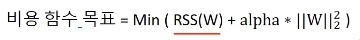

alpha 는 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터 

---

### 규제 선형 모델에서 alpha 의 역할 

- alpha가 0(또는 매우 작은 값) 이라면 비용 함수 식은 기존과 동일한 Min(RSS(W)+0)이 될 것 

- 반면 alpha가 무한대(또는 매우 큰 값)라면 비용 함수 식은 RSS(W)에 비해 alpha식이 너무 커지게 되므로 W 값을 0(또는 매우 작게) 만들어야 Cost가 최소화 되는 함수 목표를 달성 할 수 있음 

- 즉 alpha 값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며, alpha 값을 작게 하면 회귀 계수 W의 값이 커져도 어느 정도 상쇄가 가능하므로 학습 데이터 적합을 더 개선 가능 


- alpha = 0인 경우는 W가 커도 alpha식이 0이 되어 비용 함수는 Min(RSS(W)) 

- alpha = 무한대인 경우 alpha식도 무한대가 되므로 비용 함수는 W를 0에 가깝게 최소화 해야 함 

---

### 규제 선형 회귀의 유형 

- 이처럼 비용 함수에 alpha 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제(Regularization)라고 부름 

- 규제는 크기 L2방식과 L1방식으로 구분됨. L2 규제는 alpha식과 같이 w의 제곱에 대해 패널티를 부여하는 방식. L2규제를 적용한 회귀를 릿지 회귀 라고 함 

- 라쏘 회귀는 L1규제를 적용한 회귀 . L1 규제는 alpha식과 같이 w의 절댓값에 대해 패널티를 부여함 
L1 규제를 적용하면 영향력이 크지 않은 회귀 계수 값을 0으로 변환함 

- Elasticnet : L2 , L1 규제를 함께 결합한 모델 . 주로 피처가 많은 데이터 데이터 세트에서 적용되며 , L1 규제로 피처의 개수를 줄임과 동시에 L2규제로 계수 값의 크기를 조정함 






---
### 릿지 회귀 

- 릿지 회귀는 alpha값을 이용하여 회귀 계수의 크기를 조절함 (alpha값이 크기면 회귀 계수 값이 작아지고, alpha값이 작으면 회귀 계수 값이 커짐 )

- 사이킷런은 릿지 회귀를 위해 Ridge 클래스를 제공 


- 사용법으로 Ridge 와 RidgeCV 가 있음 

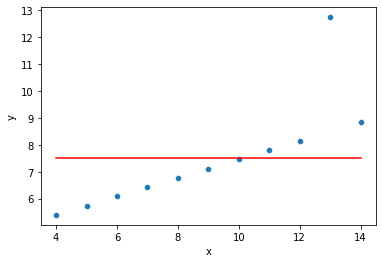

In [30]:
# 데이터 불러오기
import seaborn as sns

ans = sns.load_dataset('anscombe').query('dataset=="III"')
baseline = ans.y.mean() # 기준 모델
sns.lineplot(x='x', y=baseline, data=ans, color='red'); # 기준 모델 시각화
sns.scatterplot(x='x', y='y', data=ans);

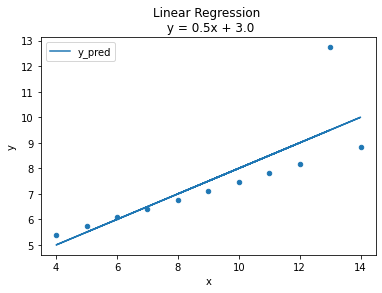

In [31]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
# 다중 선형 회귀(OLS)
%matplotlib inline

ax = ans.plot.scatter('x', 'y')

# OLS 
ols = LinearRegression()
ols.fit(ans[['x']], ans['y'])
# 회귀 계수와 intercept확인 

m = ols.coef_[0].round(2)
b = ols.intercept_.round(2)
title = f'Linear Regression \n y = {m}x + {b}'

#훈련 데이터 예측 

ans["y_pred"]= ols.predict(ans[['x']])

ans.plot('x','y_pred',ax=ax, title=title)

릿지 회귀

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

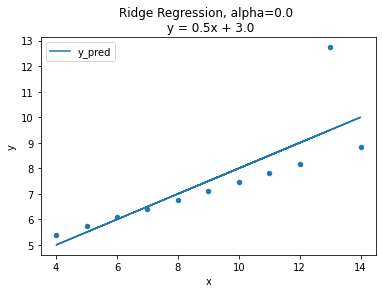

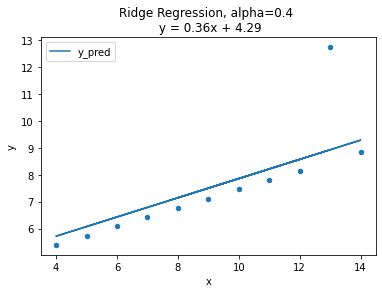

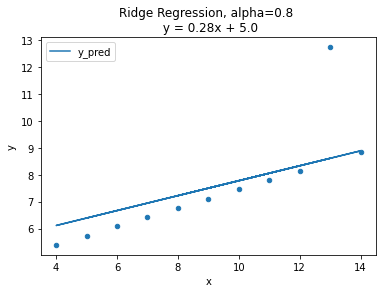

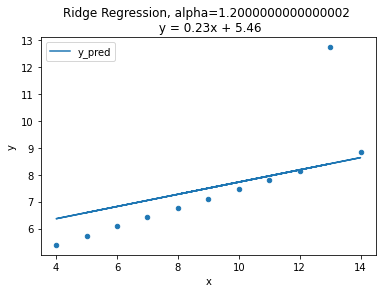

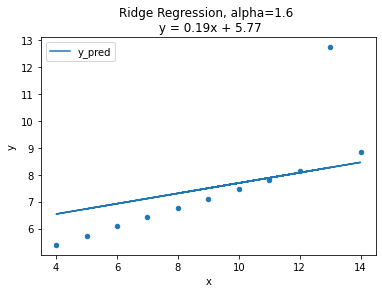

In [32]:
#릿지 회귀 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import Ridge 

def ridge_anscombe(alpha):
  ans = sns.load_dataset('anscombe').query('dataset=="III"')

  ax = ans.plot.scatter('x','y')

  ridge = Ridge(alpha=alpha, normalize=True)
  ridge.fit(ans[['x']], ans['y'])

  # 회귀계수와intercept 가져오기 
  m = ridge.coef_[0].round(2)
  b = ridge.intercept_.round(2)
  title = f'Ridge Regression, alpha={alpha} \n y = {m}x + {b}'

  # 예측 

  ans['y_pred'] = ridge.predict(ans[['x']])

  ans.plot('x','y_pred', ax=ax, title=title)

alphas = np.arange(0, 2, 0.4)

for alpha in alphas :
  ridge_anscombe(alpha=alpha )



그래프를 보면 alpha인 경우에는 ols 와 같은 그래프 형태로 같은 모델임을 확인할 수 있고 , alpha값이 커질수록 직선의 기울기가 0에 가까워지면서 평균 기준모델 (Baseline)에 가까워진다 




### Ridge & RidgeCV 구체적 활용 방법 

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/melbourne_house_prices/MELBOURNE_HOUSE_PRICES_LESS.csv')

# 범주형 특성 중 값의 종류가 너무 많은 특성은 제외
df.drop(columns=['Suburb','Address','SellerG','Date'], inplace=True)

# 결측치인 타겟 값 제거
df.dropna(subset=['Price'], inplace=True)

# 중복된 행 제거
df.drop_duplicates(inplace=True)

In [34]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from category_encoders import OneHotEncoder

# 사용할 특성들과 타겟을 별도로 분리 
target = "Price"

data =df.drop(target, axis=1)
target = df[target]

X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.8, test_size=0.2, random_state=2)


encoder = OneHotEncoder(use_cat_names = True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [36]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error ,r2_score

alphas = [0,0.001,0.01,0.1 , 1 ]

for alpha in alphas:
  ridge = Ridge(alpha = alpha , normalize = True)
  ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f'Test MAE: ${mae:,.0f}')
  print(f'R2 Score: {r2:,.4f}\n')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

Test MAE: $255,256
R2 Score: 0.5877

Test MAE: $255,264
R2 Score: 0.5878

Test MAE: $254,701
R2 Score: 0.5874



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

Test MAE: $252,997
R2 Score: 0.5794

Test MAE: $279,498
R2 Score: 0.4742



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [37]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score

alphas = [0, 0.001, 0.01, 0.1, 1]

# RidgeCV는 alpha로 넣고자 하는 값들을 리스트로 전달하면 내부적으로 최적의 alpha값을 찾아냄
ridgecv = RidgeCV(alphas=alphas, normalize=True, cv=5)
# cv : cross-validation -> 데이터를 k등분한 후 각각에 대하여 검증 진행
# 검증 결과 가장 점수가 높은 모델을 채택
ridgecv.fit(X_train, y_train)
y_pred = ridgecv.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

print(f'alpha: {ridgecv.alpha_}') # 최종 결정된 alpha값
print(f'cv best score: {ridgecv.best_score_}') # 최종 alpha에서의 점수(R^2 of self.predict(X) wrt. y.)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

Test MAE: $255,264
R2 Score: 0.5878

alpha: 0.001
cv best score: 0.5705823371670962


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel